In [1]:
import sys
import numpy as np
import matplotlib.pyplot as pyp

In [2]:
pwd

'/home/colin_beyers/wavetracer/examples'

In [2]:
sys.path.append("../..")

In [3]:
import wavetracer.core

In [4]:
import importlib

In [5]:
importlib.reload(wavetracer.parameters)
importlib.reload(wavetracer.core)

<module 'wavetracer.core' from '/home/colin_beyers/wavetracer/examples/../../wavetracer/core.py'>

In [28]:
%load_ext autoreload
%autoreload 2

In [30]:
t=np.linspace(0,100,10000)

In [102]:
wavetracer.parameters.wave_disp_relation(k=wavetracer.parameters.k_from_lam(lam=100), H=1000, wave_regime='deep')

6.223208792084245

In [105]:
wavetracer.parameters.k_from_lam(lam=100)

0.06283185307179587

In [ ]:
a, H, t, omega, x_0, z_0, k, order="first", wave_regime="intermediate"

In [108]:
test_traj = wavetracer.core.compute_trajectory(a=1, H=1000, t=t, omega=6.223208792084245,k=0.06283185307179587, x_0=0, z_0=0, order='first', wave_regime='intermediate')

In [109]:
test_traj

array([[0.        , 1.        ],
       [0.06219814, 0.99806382],
       [0.12415542, 0.99226278],
       ...,
       [0.16036179, 0.9870583 ],
       [0.22144449, 0.97517298],
       [0.28166968, 0.95951143]])

(-1.0999999963158393,
 1.0999999395866664,
 -1.09999999676332,
 1.0999999998458723)

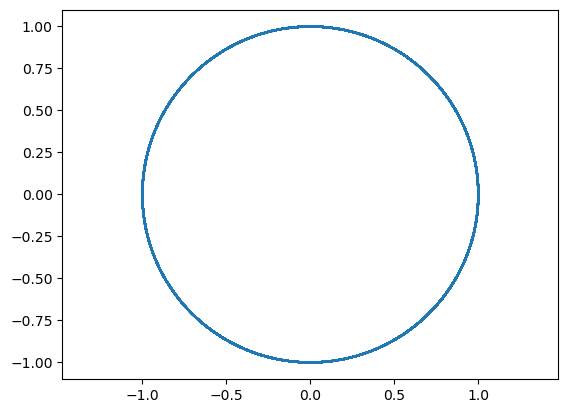

In [110]:
pyp.plot(test_traj[:,0], test_traj[:,1])
pyp.axis('equal')

In [46]:
from wavetracer import parameters

In [80]:
x = np.linspace(-1,1,10000)
k = parameters.k_from_lam(lam=100)
omega = parameters.wave_disp_relation(k=k, H=1000, wave_regime='deep')

In [92]:
# Define space and time
x = np.linspace(-100, 100, 10000)      # 100 spatial points
t = np.linspace(0, 100, 10000)   # 10000 time steps

# Compute the waveform
eta = 1*np.cos(k * x[np.newaxis, :] - omega * t[:, np.newaxis])

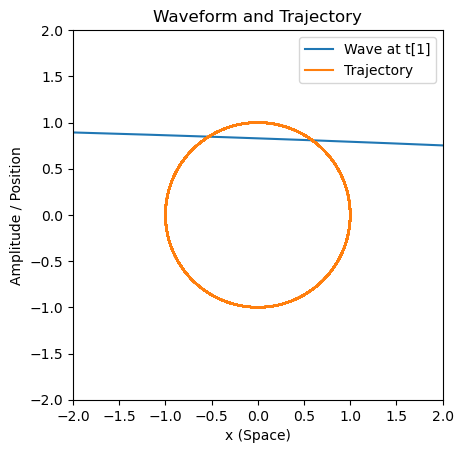

In [95]:
# Create figure and axes
fig, ax = pyp.subplots()

# Plot the wave at t[1] and the trajectory
ax.plot(x, eta[1000], label="Wave at t[1]")
ax.plot(test_traj[:, 0], test_traj[:, 1], label="Trajectory")

# Explicitly set limits before setting axis equal
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# Set axis aspect ratio to equal
ax.set_aspect("equal")  # Use set_aspect instead of axis("equal")

# Add labels and legend
ax.set_xlabel("x (Space)")
ax.set_ylabel("Amplitude / Position")
ax.legend()
ax.set_title("Waveform and Trajectory")

# Show plot
pyp.show()

In [60]:
eta

array([[1.        , 0.99195481, 0.9679487 , ..., 0.9679487 , 0.99195481,
        1.        ],
       [0.99994999, 0.99317124, 0.97041198, ..., 0.96538861, 0.99063918,
        0.99994999],
       [0.99979997, 0.99428832, 0.97277821, ..., 0.96273195, 0.98922446,
        0.99979997],
       ...,
       [0.85201873, 0.7788915 , 0.69323161, ..., 0.95618923, 0.91143666,
        0.85201873],
       [0.85721167, 0.78512466, 0.70040469, ..., 0.95906915, 0.91550583,
        0.85721167],
       [0.86231887, 0.79127929, 0.70750772, ..., 0.96185314, 0.91948342,
        0.86231887]])

In [71]:
import xarray as xr
import numpy as np

# Sample particle positions for 5 particles
x_0 = np.array([1.0, 2.0, 3.0, 4.0, 5.0])  # Initial x_0 positions for each particle
z_0 = np.array([0, 0, 0, 0, 0])  # Initial z_0 positions for each particle

# Time steps (10 time steps)
time = np.linspace(0, 100, 10000)   # 10000 time steps

# Expand x_0 and z_0 to have a time dimension (broadcast across time)
x_0_expanded = np.tile(x_0, (len(time), 1))  # Shape (10, 5)
z_0_expanded = np.tile(z_0, (len(time), 1))  # Shape (10, 5)

# Create the xarray Dataset with time as a coordinate
ds = xr.Dataset(
    {
        "x_0": (("time", "particles"), x_0_expanded),  # Now (time, particles)
        "z_0": (("time", "particles"), z_0_expanded),  # Now (time, particles)
    },
    coords={
        "time": time,  # Time coordinate
        "particles": np.arange(len(x_0)),  # Particle index (0, 1, 2, ...)
    }
)

# Print out the structure of the dataset
print(ds)


<xarray.Dataset>
Dimensions:    (time: 10000, particles: 5)
Coordinates:
  * time       (time) float64 0.0 0.01 0.02 0.03 ... 99.97 99.98 99.99 100.0
  * particles  (particles) int64 0 1 2 3 4
Data variables:
    x_0        (time, particles) float64 1.0 2.0 3.0 4.0 5.0 ... 2.0 3.0 4.0 5.0
    z_0        (time, particles) int64 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0


In [117]:
import xarray as xr
import numpy as np

# Sample particle positions for 5 particles
x_0 = np.array([1.0, 2.0, 3.0, 4.0, 5.0])  # Initial x_0 positions for each particle
z_0 = np.array([0, 0, 0, 0, 0])  # Initial z_0 positions for each particle

# Time steps (10 time steps)
time = np.linspace(0, 100, 10000)   # 10000 time steps
# Create the xarray Dataset with time as a coordinate
ds = xr.Dataset(
    {
        "x_0": (("particles"), x_0),  # Now (time, particles)
        "z_0": (("particles"), z_0),  # Now (time, particles)
    },
    coords={
        "time": time,  # Time coordinate
        "particles": np.arange(len(x_0)),  # Particle index (0, 1, 2, ...)
    }
)

# Print out the structure of the dataset
print(ds)


<xarray.Dataset>
Dimensions:    (particles: 5, time: 10000)
Coordinates:
  * time       (time) float64 0.0 0.01 0.02 0.03 ... 99.97 99.98 99.99 100.0
  * particles  (particles) int64 0 1 2 3 4
Data variables:
    x_0        (particles) float64 1.0 2.0 3.0 4.0 5.0
    z_0        (particles) int64 0 0 0 0 0


In [146]:
ds

<xarray.Dataset>
Dimensions:    (particles: 5, time: 10000)
Coordinates:
  * time       (time) float64 0.0 0.01 0.02 0.03 ... 99.97 99.98 99.99 100.0
  * particles  (particles) int64 0 1 2 3 4
Data variables:
    x_0        (particles) float64 1.0 2.0 3.0 4.0 5.0
    z_0        (particles) int64 0 0 0 0 0
    x          (particles, time) float64 0.9372 0.9994 1.062 ... 4.909 4.971
    z          (particles, time) float64 0.998 1.0 0.9981 ... 0.9959 0.9996

In [135]:
importlib.reload(wavetracer.core)

<module 'wavetracer.core' from '/home/colin_beyers/wavetracer/examples/../../wavetracer/core.py'>

In [119]:
ds['x'], ds['z']  = xr.apply_ufunc(
    wavetracer.core.compute_trajectory,
    ds['x_0'], ds['z_0'], ds['time'], 1, 1000, 0.06283185307179587, 6.223208792084245, 'first', 'deep', # function parameters here
    input_core_dims=[[], [], ['time'], [], [], [], [], [], []],
    output_core_dims=[["time"], ['time']],
    vectorize=True,  # Apply function across particles and time
    dask='allowed'  # This will let Dask parallelize the computation (optional)
)

time: <class 'numpy.ndarray'> (10000,)
x_0: <class 'numpy.float64'> () 1.0
z_0: <class 'numpy.int64'> () 0
calc complete
[[0.93720948 0.99802673]
 [0.99940646 0.99999982]
 [1.06160574 0.99810056]
 ...
 [1.09806745 0.99517977]
 [1.1597759  0.98715331]
 [1.22086564 0.97530424]]
time: <class 'numpy.ndarray'> (10000,)
x_0: <class 'numpy.float64'> () 2.0
z_0: <class 'numpy.int64'> () 0
calc complete
[[1.87466677 0.9921147 ]
 [1.93661712 0.99798928]
 [1.99881292 0.9999993 ]
 ...
 [2.03538608 0.99937372]
 [2.09747675 0.9952378 ]
 [2.15918996 0.98724797]]
time: <class 'numpy.ndarray'> (10000,)
x_0: <class 'numpy.float64'> () 3.0
z_0: <class 'numpy.int64'> () 0
calc complete
[[2.81261869 0.98228725]
 [2.87407793 0.99204014]
 [2.93602478 0.99795149]
 ...
 [2.97256506 0.99962359]
 [3.0347929  0.99939454]
 [3.09688602 0.99529548]]
time: <class 'numpy.ndarray'> (10000,)
x_0: <class 'numpy.float64'> () 4.0
z_0: <class 'numpy.int64'> () 0
calc complete
[[3.75131011 0.96858316]
 [3.81203569 0.98217586

In [120]:
ds

<xarray.Dataset>
Dimensions:    (particles: 5, time: 10000)
Coordinates:
  * time       (time) float64 0.0 0.01 0.02 0.03 ... 99.97 99.98 99.99 100.0
  * particles  (particles) int64 0 1 2 3 4
Data variables:
    x_0        (particles) float64 1.0 2.0 3.0 4.0 5.0
    z_0        (particles) int64 0 0 0 0 0
    x          (particles, time) float64 0.9372 0.9994 1.062 ... 4.909 4.971
    z          (particles, time) float64 0.998 1.0 0.9981 ... 0.9959 0.9996

In [114]:
ds.x.isel(particles=1)

<xarray.DataArray 'x' (time: 10000)>
array([1.87466677, 1.93661712, 1.99881292, ..., 2.03538608, 2.09747675,
       2.15918996])
Coordinates:
  * time       (time) float64 0.0 0.01 0.02 0.03 ... 99.97 99.98 99.99 100.0
    particles  int64 1

In [128]:
for i in range(1, len(ds.particles) + 1):
    print(i)



1
2
3
4
5


In [289]:
importlib.reload(wavetracer.core)

<module 'wavetracer.core' from '/home/colin_beyers/wavetracer/examples/../../wavetracer/core.py'>

In [320]:
t=np.linspace(0,100,10000)
# Generate 10 random numbers between 0 and 5
x_0 = np.random.uniform(0, 5, 5)  # 10 random floats between 0 and 5
z_0 = np.random.uniform(-5, 0, 5)  # 10 random floats between 0 and 5

print("x_0:", x_0)
print("z_0:", z_0)

x_0: [4.42375318 2.42989064 2.74411366 3.14640065 3.81705898]
z_0: [-3.35201146 -1.69728755 -3.92000189 -2.4107034  -3.63084746]


In [321]:
ds_100 = wavetracer.core.build_dataset(x_0, z_0, t, grid=True)

In [322]:
importlib.reload(wavetracer.core)
importlib.reload(wavetracer.parameters)

<module 'wavetracer.parameters' from '/home/colin_beyers/wavetracer/examples/../../wavetracer/parameters.py'>

In [323]:
# Define the parameters
params = {
    'a': 1.0,       # Wave amplitude
    'H': 4000,        # Water depth
    'lam': 100,       # Wavenumber
    'order': 'second',  # Optional: Order for the approximation
}

# Call the function with the params dictionary
ds_100 = wavetracer.core.compute_trajectories(ds_100, **params)

Regime:  deep
[ 0.          3.28571429  6.57142857  9.85714286 13.14285714 16.42857143
 19.71428571 23.         26.28571429 29.57142857 32.85714286 36.14285714
 39.42857143 42.71428571 46.         49.28571429 52.57142857 55.85714286
 59.14285714 62.42857143 65.71428571 69.        ]


In [324]:
ds_100

<xarray.Dataset>
Dimensions:    (time: 10000, particles: 25, x_eta: 22)
Coordinates:
  * time       (time) float64 0.0 0.01 0.02 0.03 ... 99.97 99.98 99.99 100.0
  * particles  (particles) int64 0 1 2 3 4 5 6 7 8 ... 17 18 19 20 21 22 23 24
    x_0        (particles) float64 4.424 2.43 2.744 3.146 ... 2.744 3.146 3.817
    z_0        (particles) float64 -3.352 -3.352 -3.352 ... -3.631 -3.631 -3.631
  * x_eta      (x_eta) float64 0.0 3.286 6.571 9.857 ... 59.14 62.43 65.71 69.0
Data variables:
    x          (particles, time) float64 4.201 4.305 4.411 ... 53.43 53.53 53.63
    z          (particles, time) float64 -2.573 -2.551 -2.542 ... -2.852 -2.878
    eta        (time, x_eta) float64 1.0 0.9788 0.916 ... -0.9146 -0.8123

In [263]:
time = 120

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


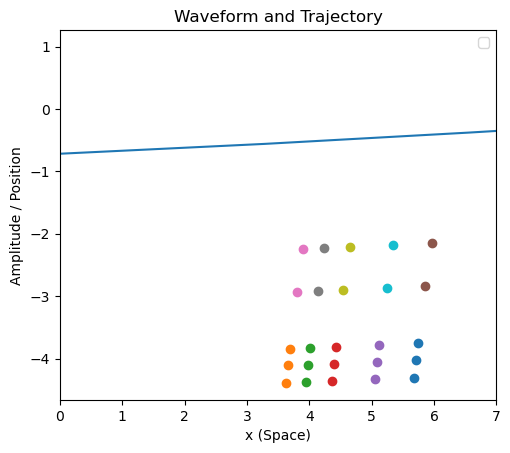

In [331]:
# Create figure and axes
fig, ax = pyp.subplots()

for particle in ds_100.particles:
    traj = ds_100.isel(particles=particle)
    ax.scatter(traj.isel(time=time).x, traj.isel(time=time).z)

pyp.plot(ds_100.x_eta, ds_100.isel(time=time).eta)

ax.set_xlim(0,7)
# Set axis aspect ratio to equal
ax.set_aspect("equal")  # Use set_aspect instead of axis("equal")

# Add labels and legend
ax.set_xlabel("x (Space)")
ax.set_ylabel("Amplitude / Position")
ax.legend()
ax.set_title("Waveform and Trajectory")

# Show plot
pyp.show()

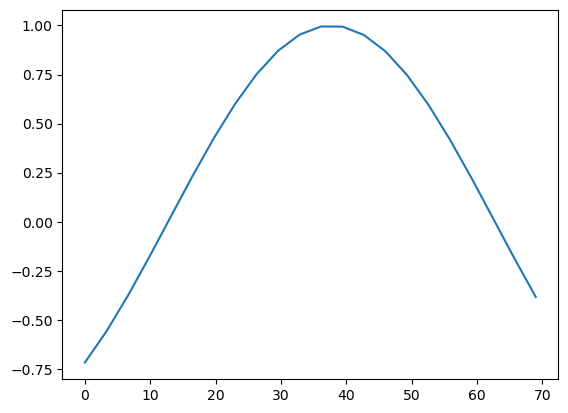

In [329]:
pyp.plot(ds_100.x_eta, ds_100.isel(time=time).eta)

In [327]:
ds_100.x_eta

<xarray.DataArray 'x_eta' (x_eta: 22)>
array([ 0.      ,  3.285714,  6.571429,  9.857143, 13.142857, 16.428571,
       19.714286, 23.      , 26.285714, 29.571429, 32.857143, 36.142857,
       39.428571, 42.714286, 46.      , 49.285714, 52.571429, 55.857143,
       59.142857, 62.428571, 65.714286, 69.      ])
Coordinates:
  * x_eta    (x_eta) float64 0.0 3.286 6.571 9.857 ... 59.14 62.43 65.71 69.0

In [328]:
ds_100.isel(time=time).eta

<xarray.DataArray 'eta' (x_eta: 22)>
array([-0.71737551, -0.55933252, -0.377535  , -0.17970379,  0.02575934,
        0.23012848,  0.4247242 ,  0.60128213,  0.75230396,  0.87137588,
        0.95344098,  0.99501399,  0.99432934,  0.95141611,  0.86809678,
        0.7479099 ,  0.59595971,  0.41869947,  0.2236573 ,  0.01911654,
       -0.18623609, -0.38367938])
Coordinates:
    time     float64 1.2
  * x_eta    (x_eta) float64 0.0 3.286 6.571 9.857 ... 59.14 62.43 65.71 69.0